In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import accuracy_score

# 1. connect to drive and import the file

**1. Connect to the drive account**

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.9MB/s 


**2. List down all the files in the directory**

In [3]:
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned.csv, id 1-Rqq385lEA4AeLddC3ghY1Zkr5LF64at


**3. Import the file to here**

In [0]:
# importing the file
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1-Rqq385lEA4AeLddC3ghY1Zkr5LF64at'  # https://drive.google.com/open?id=1-Rqq385lEA4AeLddC3ghY1Zkr5LF64at
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('mobile_cleaned.csv')

# 2. data preparation and exploration

In [5]:
data = pd.read_csv('mobile_cleaned.csv')
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [6]:
data.describe()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
count,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.981651,7.733945,29.990826,154.358716,404.66055,1.633394,8.330275,3.844037,4.840550,2.954128,...,3.541284,14.743119,4.908257,74.261468,104.513761,6.082569,4.376147,2841.779817,50.788991,0.844037
std,1.347025,3.201973,15.300385,22.394333,176.44206,0.386773,1.173828,1.582159,2.578122,0.416896,...,1.437153,7.963346,1.708049,7.908726,275.799767,2.546342,3.146983,655.003963,49.496366,0.364496
min,0.000000,0.000000,3.000000,97.000000,160.00000,1.000000,5.100000,0.000000,0.300000,0.000000,...,0.000000,0.000000,0.000000,58.600000,0.000000,0.000000,0.000000,1560.000000,1.000000,0.000000
25%,0.000000,8.000000,16.000000,140.000000,264.00000,1.300000,7.600000,2.000000,4.000000,3.000000,...,3.000000,9.000000,3.000000,70.900000,0.000000,5.000000,3.000000,2470.000000,12.000000,1.000000
50%,0.000000,8.000000,29.000000,152.000000,360.00000,1.600000,8.100000,5.000000,5.000000,3.000000,...,4.000000,14.000000,6.000000,73.700000,32.000000,6.000000,3.000000,2900.000000,21.000000,1.000000
75%,3.000000,10.000000,41.000000,169.000000,500.00000,1.800000,8.900000,5.000000,5.000000,3.000000,...,4.000000,20.000000,6.000000,76.700000,128.000000,6.000000,4.000000,3100.000000,92.000000,1.000000
max,4.000000,14.000000,56.000000,234.000000,1093.00000,2.700000,11.600000,7.000000,16.000000,4.000000,...,6.000000,34.000000,7.000000,136.500000,2048.000000,14.000000,14.000000,5000.000000,166.000000,1.000000


No handles with labels found to put in legend.


<Figure size 1800x1080 with 0 Axes>

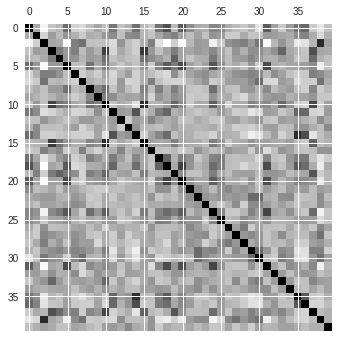

In [7]:
fig = plt.figure(figsize=(25,15))
plt.matshow(data.corr())
plt.legend()
plt.show()

**Task**: to make a like/dislike mobile predictor

In [8]:
data['usb_type'].unique()

array([ 3,  7,  4,  8,  5,  1,  2, 14, 10, 13,  9, 12,  0, 11,  6])

In [9]:
data['is_liked'].unique() # this is the output

array([1, 0])

In [0]:
# separating the dependent and independent variables
X_data = data.iloc[:,0:len(data.columns)-1]
Y_data = data.iloc[:,len(data.columns)-1]
Y = Y_data.values.reshape(-1,1)

In [11]:
X_data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,6,4,2,3,67.8,64.0,5,3,2000,125
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,6,4,4,6,64.0,32.0,5,3,2000,165
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,6,4,9,6,72.0,32.0,6,3,2500,164
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,6,4,1,3,75.1,32.0,6,3,3000,165
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,6,4,1,6,91.0,32.0,6,3,3000,165


We need to only standardize the independent variables.

# Preprocessing the data

In [0]:
def standardize_X(X):
  m,n = np.shape(X)
  #standardizing the data
  X_std = np.zeros(shape=(m,n))
  for col in range(n):
    current = X[:,col]
    x_min = np.min(current)
    x_max = np.max(current)
    for i,x_i in enumerate(current):
      std_value=(x_i-x_min)/(x_max-x_min)
      current[i] = std_value
    X_std[:,col] = current
  return X_std

In [0]:
X_std = standardize_X(X_data.values)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X_std,Y,test_size=0.2,random_state=0,stratify=Y)
np.shape(X_train), np.shape(X_test)

((87, 39), (22, 39))

In [15]:
# check the split
np.mean(X_train), np.mean(X_test), np.mean(Y_train), np.mean(Y_test)

(0.38331197648349835,
 0.4052927205541262,
 0.8390804597701149,
 0.8636363636363636)

# Learning Algorithm

p = inputs that are labelled as 1

n = inputs that are labelled as 0

while !convergence do 

    pick random x
    if x belong to p and sum(wi*x*) < 0 then
        w = w+x;
     end
     if x belong to n and sum(wi*x*) > 0 then
        w = w-x;
     end

In [0]:
def initiate_weights(X):
  m,n = np.shape(X)
  ones = np.ones(shape=(m,1))
  X_1 = np.concatenate((ones,X),axis=1)
  m,n = np.shape(X_1)
  theta = np.ones(shape=(n,1))
  return theta,X_1

theta, X_train_1 = initiate_weights(X_train)

**Model - **

if $\sum_{i=0}^n  w_i x_i$ > 0, then y = 0,

else

y = 1

In [0]:
class Perceptron:
  
  def __init__(self):
    self.w = None
    self.b = None
    self.accuracies = None
    self.max_accuracy = None

  def model(self,x):    
    value = np.dot(x,self.w)
    if (value)>=self.b:
      return 1
    else:
      return 0
  
  def predict(self,X):
    Y_pred = []
    for x in X:
      pred = self.model(x)
      Y_pred.append(pred)
    return np.array(Y_pred)
  
  def fit(self,X,Y,epochs=1,lr=1):
    
    # initial assumption
    self.w = np.zeros(X.shape[1])
    self.b = 0
    
    accuracies = {}
    max_accuracy = 0    
    wt_matrix = []
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0:
          self.w += lr*x
          self.b += lr*1
        if y==0 and y_pred==1:
          self.w -= lr*x
          self.b -= lr*1
     
      wt_matrix.append(np.array(self.w))
      
      Y_pred = self.predict(X)
      accuracies[i] = accuracy_score(Y_pred,Y)
      if (accuracies[i] > max_accuracy):
        max_accuracy = accuracies[i]
        # checkpointing - whenever there is highest accuracy the iteration 
        # will store the parameters otherwise it will ignore
        chkptw = self.w
        chkptb = self.b
      
    self.w = chkptw
    self.b = chkptb
      
    self.accuracies = accuracies
    self.max_accuracy = max_accuracy
    return np.array(wt_matrix)

In [0]:
perceptron = Perceptron()

iterations = 1000
wts = perceptron.fit(X_train,Y_train,epochs=iterations,lr=0.1)

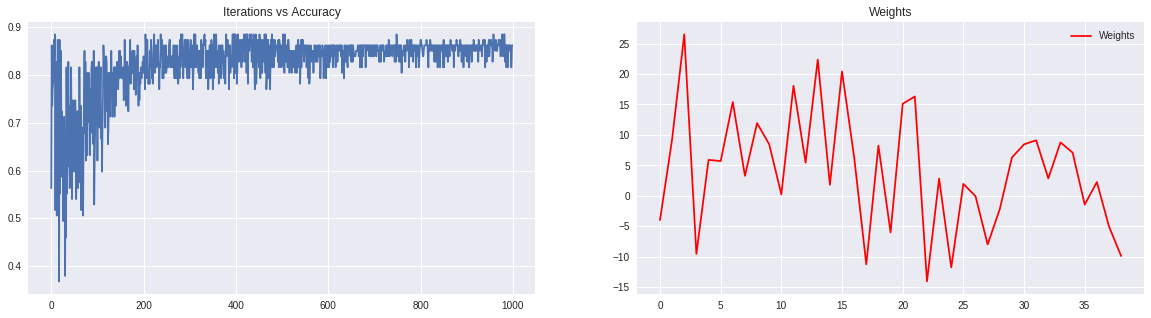

In [19]:
plt.figure(figsize=(20,5))
ax1=plt.subplot(121)
ax1.set_title('Iterations vs Accuracy')
ax1.plot(perceptron.accuracies.values())
ax1.plot()

plt.subplot(122)
plt.title('Weights')
plt.plot(wts[-1,:],color='red',label='Weights')
plt.legend()

# Animation of Learning

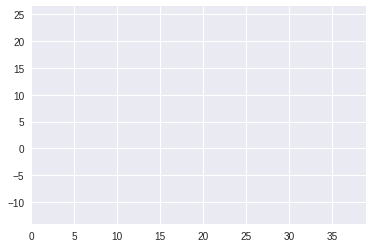

In [20]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML


y_min, y_max = min(perceptron.w),max(perceptron.w)

fig, ax = plt.subplots()
ax.set_xlim(left=0, right=len(perceptron.w))
ax.set_ylim(bottom= y_min, top=y_max)

line, = ax.plot([], [], lw=2)

In [21]:
def animate(i):
    x = list(range(len(perceptron.w)))
    y = wts[i,:]
    line.set_data(x, y)
    return (line,)
  
anim = animation.FuncAnimation(fig, animate,
                               frames=iterations, interval=10, 
                               blit=True)

HTML(anim.to_html5_video())

# Validation on test set

In [22]:
np.shape(X_test),np.shape(perceptron.w)

((22, 39), (39,))

In [23]:
Y_test_pred = perceptron.predict(X_test)
accuracy_score(Y_test_pred,Y_test)

0.8636363636363636

The accuracy seems to be less. We need to solve this issue by elimination of some non-signicifant variables from the model. This will simplify the model and learning as well. This will give more weight to the significant varibles.

# Modelling with less variables

**List of significant coefficients**

In [24]:
sig_feature = {}
for i, w in enumerate(perceptron.w):
  if np.abs(w) > 15:
    sig_feature[i] = w

indices = list(sig_feature.keys())
features = X_data.columns
for i in indices:
  print(features[i], sig_feature[i])

gpu_rank 26.51509433962287
thickness 15.398461538461186
frames_per_second 18.06666666666665
no_of_reviews_in_gsmarena_in_week 22.367714723926042
phone_height 20.422619047619335
video_resolution 15.108641975308839
display_resolution 16.305555555555905


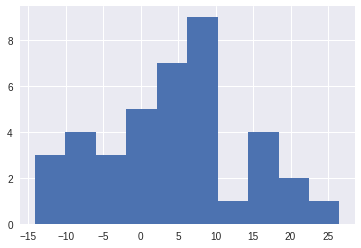

In [25]:
plt.hist(perceptron.w)
plt.show()

In [26]:
X_new = X_data[list(sig_features)]
X_new.head()

NameError: ignored